In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import  Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [2]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:44<00:00, 25.9MB/s]
100% 1.06G/1.06G [00:44<00:00, 25.7MB/s]


In [4]:
! unzip /content/dogs-vs-cats.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dogs/dog.4419.jpg  
  inflating: train/dogs/dog.442.jpg  
  inflating: train/dogs/dog.4420.jpg  
  inflating: train/dogs/dog.4421.jpg  
  inflating: train/dogs/dog.4422.jpg  
  inflating: train/dogs/dog.4424.jpg  
  inflating: train/dogs/dog.4425.jpg  
  inflating: train/dogs/dog.4426.jpg  
  inflating: train/dogs/dog.4427.jpg  
  inflating: train/dogs/dog.4431.jpg  
  inflating: train/dogs/dog.4433.jpg  
  inflating: train/dogs/dog.4436.jpg  
  inflating: train/dogs/dog.4438.jpg  
  inflating: train/dogs/dog.4439.jpg  
  inflating: train/dogs/dog.444.jpg  
  inflating: train/dogs/dog.4440.jpg  
  inflating: train/dogs/dog.4441.jpg  
  inflating: train/dogs/dog.4442.jpg  
  inflating: train/dogs/dog.4443.jpg  
  inflating: train/dogs/dog.4444.jpg  
  inflating: train/dogs/dog.4445.jpg  
  inflating: train/dogs/dog.4446.jpg  
  inflating: train/dogs/dog.445.jpg  
  inflating: train/dogs/dog.4450.jpg  
  inflating: tra

In [7]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs_vs_cats/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs_vs_cats/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# def process(image,label):
#     image = tf.cast(image/255. ,tf.float32)
#     return image,label

# train_ds = train_ds.map(process)
# validation_ds = validation_ds.map(process)

In [6]:
# model = Sequential()

# model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# model.add(Flatten())

# model.add(Dense(128,activation='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(64,activation='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(1,activation='sigmoid'))


resnet_model = Sequential()

pretrained_model = tf.keras.applications.ResNet50(
    include_top=False,
    input_shape = (256,256,3),
    pooling= "avg",
    classes=2,
    weights = "imagenet")

resnet_model.add(pretrained_model)

94765736/94765736 [==============================] - 5s 0us/step


In [8]:
resnet_model.add(Flatten())
resnet_model.add(Dense(100, activation = "relu"))
resnet_model.add(Dense(1, activation = "sigmoid"))

resnet_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 100)               204900    
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 23792713 (90.76 MB)
Trainable params: 23739593 (90.56 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [9]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss="binary_crossentropy", metrics=["accuracy"])

history = resnet_model.fit(train_ds, validation_data= validation_ds, epochs = 10)

Epoch 1/10
625/625 [==============================] - 311s 434ms/step - loss: 0.2215 - accuracy: 0.9090 - val_loss: 0.4517 - val_accuracy: 0.7610
Epoch 2/10
625/625 [==============================] - 269s 431ms/step - loss: 0.1433 - accuracy: 0.9420 - val_loss: 0.3566 - val_accuracy: 0.8074
Epoch 3/10
625/625 [==============================] - 268s 429ms/step - loss: 0.1138 - accuracy: 0.9525 - val_loss: 0.1536 - val_accuracy: 0.9378
Epoch 4/10
625/625 [==============================] - 268s 429ms/step - loss: 0.0956 - accuracy: 0.9624 - val_loss: 0.3701 - val_accuracy: 0.8204
Epoch 5/10
625/625 [==============================] - 270s 431ms/step - loss: 0.0933 - accuracy: 0.9647 - val_loss: 0.3251 - val_accuracy: 0.8806
Epoch 6/10
625/625 [==============================] - 270s 431ms/step - loss: 0.0773 - accuracy: 0.9704 - val_loss: 0.3216 - val_accuracy: 0.8930
Epoch 7/10
625/625 [==============================] - 268s 428ms/step - loss: 0.0677 - accuracy: 0.9744 - val_loss: 0.1788 -

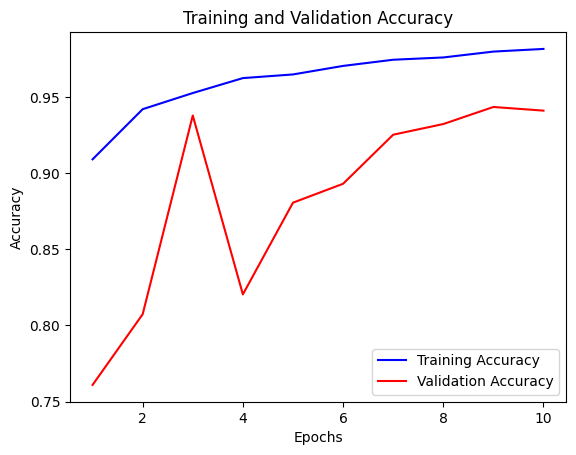

In [10]:
import matplotlib.pyplot as plt

# Get training and validation accuracy from history
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Create a range of epochs
epochs = range(1, len(training_accuracy) + 1)

# Plotting
plt.plot(epochs, training_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show plot
plt.show()


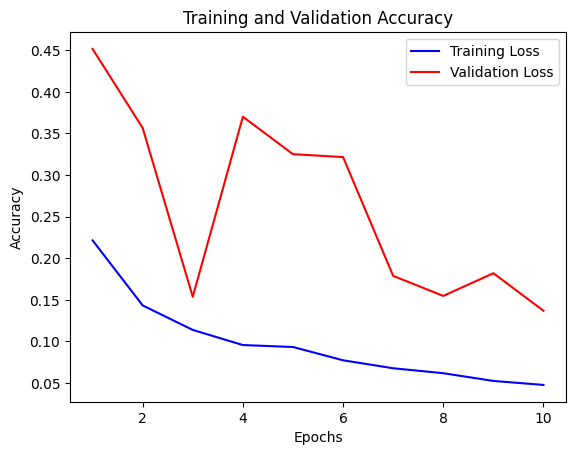

In [11]:
import matplotlib.pyplot as plt

# Get training and validation accuracy from history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Create a range of epochs
epochs = range(1, len(training_accuracy) + 1)

# Plotting
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show plot
plt.show()

In [ ]:
# model.fit(train_ds, epochs=5, validation_data= validation_ds)
# model.compile(optimizer="Adam", loss = "binary_crossentropy", metrics = ["accuracy"])


Epoch 1/5
625/625 [==============================] - 77s 107ms/step - loss: 0.9599 - accuracy: 0.6097 - val_loss: 0.6077 - val_accuracy: 0.6730
Epoch 2/5
625/625 [==============================] - 64s 102ms/step - loss: 0.5446 - accuracy: 0.7243 - val_loss: 0.5082 - val_accuracy: 0.7504
Epoch 3/5
625/625 [==============================] - 65s 103ms/step - loss: 0.4684 - accuracy: 0.7822 - val_loss: 0.4596 - val_accuracy: 0.7872
Epoch 4/5
625/625 [==============================] - 64s 102ms/step - loss: 0.4300 - accuracy: 0.8081 - val_loss: 0.4468 - val_accuracy: 0.8062
Epoch 5/5
625/625 [==============================] - 67s 106ms/step - loss: 0.3342 - accuracy: 0.8537 - val_loss: 0.4844 - val_accuracy: 0.7870
